# ECON 607 Assignment 5

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.cluster as cluster
import warnings
warnings.filterwarnings('ignore')

## Import Data & Rename Columns

In [2]:
import os
print(os.getcwd())
for dirname, _, filenames in os.walk('/Users/andrew/Downloads/UW courses/ECON 607/Assignment 5'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/andrew/Downloads/UW courses/ECON 607/Assignment 5
/Users/andrew/Downloads/UW courses/ECON 607/Assignment 5/ECON607_assign5.py
/Users/andrew/Downloads/UW courses/ECON 607/Assignment 5/Mall_Customers.csv
/Users/andrew/Downloads/UW courses/ECON 607/Assignment 5/ECON607_assign5.ipynb
/Users/andrew/Downloads/UW courses/ECON 607/Assignment 5/mallClusters.csv


In [3]:
df = pd.read_csv('/Users/andrew/Downloads/UW courses/ECON 607/Assignment 5/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Check descriptive statistics

In [5]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Plot Age, Income and Spending Score Correlation


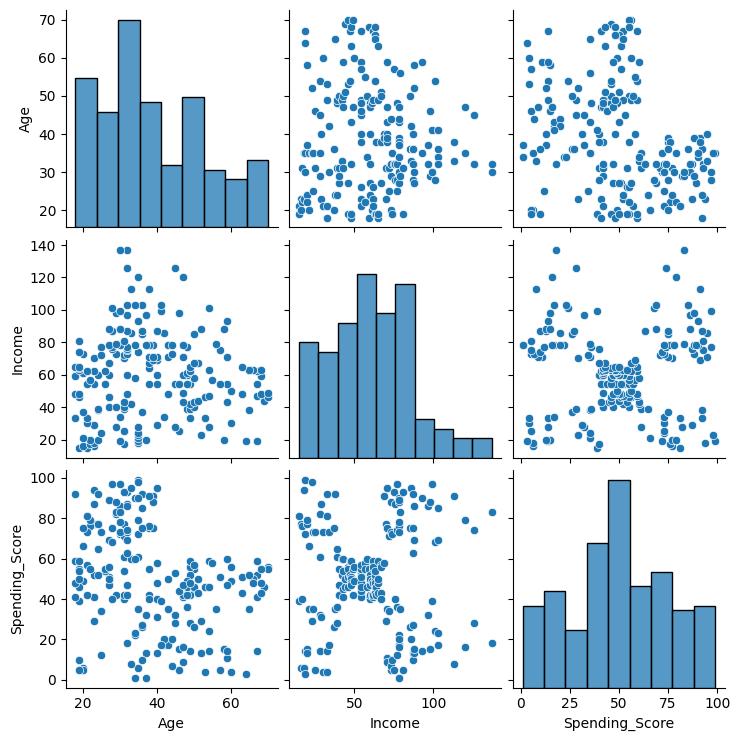

In [6]:
sns.pairplot(df[['Age','Income', 'Spending_Score']])

In [7]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [8]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

In [9]:
df['Clusters'] = kmeans.labels_

In [10]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1


In [11]:
df['Clusters'].value_counts()

Clusters
2    81
0    39
4    35
1    23
3    22
Name: count, dtype: int64

## Export Data with Clusters

In [12]:
df.to_csv('mallClusters.csv', index = False)

## Plot Clusters on chart

<Axes: xlabel='Spending_Score', ylabel='Income'>

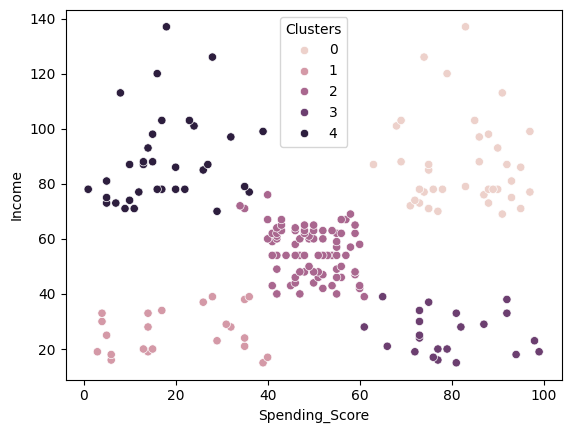

In [13]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)